<a href="https://colab.research.google.com/github/mandliya/dailyLearning/blob/main/ChatGPT_Prompt_Engineering_for_Developers/Iterative_prompt_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq openai
!pip install -qq python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.5 MB/s eta 0:00:00


In [5]:
import openai
import os
from IPython.display import display, Markdown, Latex

from dotenv import load_dotenv
_ = load_dotenv('env_colab')

openai.api_key = os.getenv('OPENAI_API_KEY')

In [3]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

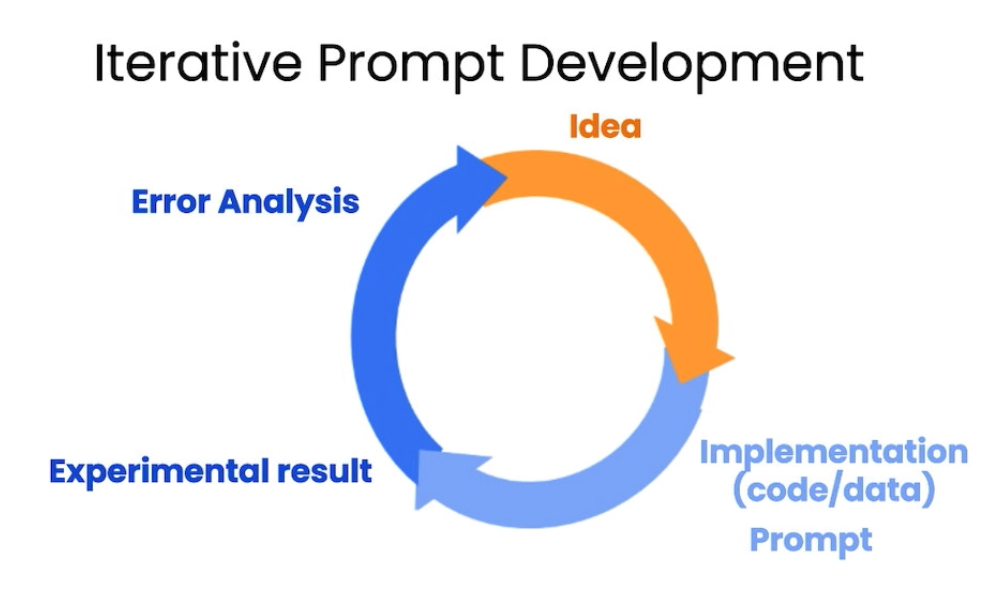

What Isa and Andrew explain is to continuously iterate on your prompt to get what you need. Prompt Engineering is often iterative, and you have to continuously tweak your prompt to nudge model to get what you want.
Even though you know what you want, you'll often have to iterate on prompt to get it to output exactly what you want.

I'll try this with an example.

Say I want to write a python function which converts epoch to a timestamp in PST.

In [6]:
prompt = f'''
Write a python function to convert epoch to a timestamp in PST.
'''

display(Markdown(get_completion(prompt)))

As an AI language model, I don't have access to the current time zone. However, here's a Python function that converts epoch to a timestamp in Pacific Standard Time (PST) assuming the local time zone is PST:

```python
import datetime

def epoch_to_pst(epoch):
    # Convert epoch to datetime object
    dt = datetime.datetime.fromtimestamp(epoch)
    # Convert datetime object to PST timezone
    pst = dt.astimezone(datetime.timezone(datetime.timedelta(hours=-8)))
    # Format PST timestamp
    pst_timestamp = pst.strftime('%Y-%m-%d %H:%M:%S %Z')
    return pst_timestamp
```

To use this function, simply pass in the epoch time as an argument:

```python
epoch = 1609459200  # January 1, 2021 00:00:00 UTC
pst_timestamp = epoch_to_pst(epoch)
print(pst_timestamp)  # Output: 2020-12-31 16:00:00 PST
```

Note that the output will vary depending on the current time zone.

You see, not the best output. Let's modify this a bit.

In [7]:
prompt = f'''
Write a python function to convert an epoch time to a timestamp in PST.
Provide response in markdown. The timestamp in PST should be like
"Jan 1, 2023 4:50 AM PST"
'''

display(Markdown(get_completion(prompt)))


```python
import datetime

def epoch_to_pst(epoch_time):
    # Convert epoch time to datetime object
    dt_object = datetime.datetime.fromtimestamp(epoch_time)
    # Convert datetime object to PST timezone
    pst_timezone = datetime.timezone(datetime.timedelta(hours=-8))
    dt_pst = dt_object.astimezone(pst_timezone)
    # Format datetime object to desired string format
    dt_string = dt_pst.strftime("%b %d, %Y %I:%M %p PST")
    return dt_string
```

Explanation:
1. The function takes an epoch time as input.
2. The epoch time is converted to a datetime object using the `fromtimestamp()` method.
3. The datetime object is then converted to the PST timezone using the `astimezone()` method and a `datetime.timezone()` object with a timedelta of -8 hours (PST is 8 hours behind UTC).
4. Finally, the datetime object is formatted into a string with the desired format using the `strftime()` method and returned.

Example usage:
```python
>>> epoch_to_pst(1640995800)
'Dec 31, 2021 04:50 PM PST'
```

Not bad, but what if the input is wrong? We need error handling too.


In [10]:
prompt = f'''
Write a python function to convert an epoch time to a timestamp in PST.
Provide response in markdown. Include appropriate error handling. \
The timestamp in PST should be like "Jan 1, 2023 4:50 AM PST".
'''

display(Markdown(get_completion(prompt)))

```python
import datetime

def epoch_to_pst(epoch_time):
    try:
        # Convert epoch time to datetime object
        dt_obj = datetime.datetime.fromtimestamp(epoch_time)
        # Convert datetime object to PST timezone
        pst_tz = datetime.timezone(datetime.timedelta(hours=-8), 'PST')
        pst_time = dt_obj.astimezone(pst_tz)
        # Format timestamp string
        timestamp = pst_time.strftime("%b %d, %Y %I:%M %p PST")
        return timestamp
    except Exception as e:
        print("Error:", e)
        return None
```

This function takes an epoch time as input and returns a timestamp in PST timezone. It first converts the epoch time to a datetime object using the `fromtimestamp()` method. Then it creates a timezone object for PST timezone with an offset of -8 hours from UTC and applies it to the datetime object using the `astimezone()` method. Finally, it formats the timestamp string using the `strftime()` method with the desired format.

The function also includes error handling using a try-except block. If any error occurs during the conversion process, it prints an error message and returns None.

Let's try the output.

In [19]:
import datetime

def epoch_to_pst(epoch_time):
    try:
        # Convert epoch time to datetime object
        dt_obj = datetime.datetime.fromtimestamp(epoch_time)
        # Convert datetime object to PST timezone
        pst_tz = datetime.timezone(datetime.timedelta(hours=-8), 'PST')
        pst_time = dt_obj.astimezone(pst_tz)
        # Format timestamp string
        timestamp = pst_time.strftime("%b %d, %Y %I:%M %p PST")
        return timestamp
    except Exception as e:
        print("Error:", e)
        return None

epoch_to_pst("-2132423343")

Error: 'str' object cannot be interpreted as an integer


Oops, forgot the docstring. Let's iterate a bit more.

In [20]:
prompt = f'''
Write a python function to convert an epoch time to a timestamp in PST.
Provide response in markdown. Include appropriate error handling. \
Write docstring of the function too. The timestamp in PST should be \
like "Jan 1, 2023 4:50 AM PST".
'''

display(Markdown(get_completion(prompt)))

```python
from datetime import datetime
import pytz

def epoch_to_pst(epoch_time):
    """
    Converts an epoch time to a timestamp in PST.

    Args:
        epoch_time (int): Epoch time in seconds.

    Returns:
        str: Timestamp in PST format like "Jan 1, 2023 4:50 AM PST".

    Raises:
        TypeError: If epoch_time is not an integer.
    """
    try:
        if not isinstance(epoch_time, int):
            raise TypeError("Epoch time must be an integer.")
        pst = pytz.timezone('America/Los_Angeles')
        dt = datetime.fromtimestamp(epoch_time, pst)
        return dt.strftime('%b %d, %Y %I:%M %p PST')
    except Exception as e:
        print(f"Error: {e}")
```

The function `epoch_to_pst` takes an epoch time in seconds as an argument and returns a timestamp in PST format like "Jan 1, 2023 4:50 AM PST". It uses the `datetime` module to convert the epoch time to a datetime object and the `pytz` module to set the timezone to PST. 

The function includes appropriate error handling to raise a `TypeError` if the epoch time is not an integer. If any other exception occurs, it will print an error message. 

The function also includes a docstring that explains the purpose of the function, the arguments it takes, the return value, and any exceptions it may raise.

Although all good, but it used `pytz` now. I want it to use more preferred `zoneinfo`. Let's modify the prompt.

In [22]:
prompt = f'''
Write a python function to convert an epoch time to a timestamp in PST.
Provide response in markdown. Include appropriate error handling. \
Don't use `pytz` and use `zoneinfo` instead.
Write docstring of the function too. The timestamp in PST should be \
like "Jan 1, 2023 4:50 AM PST".
'''

display(Markdown(get_completion(prompt)))

```python
from datetime import datetime
from zoneinfo import ZoneInfo

def epoch_to_pst(epoch_time):
    """
    Converts an epoch time to a timestamp in PST.

    Args:
        epoch_time (int): Epoch time in seconds.

    Returns:
        str: Timestamp in PST format like "Jan 1, 2023 4:50 AM PST".

    Raises:
        TypeError: If epoch_time is not an integer.
    """
    try:
        epoch_time = int(epoch_time)
    except ValueError:
        raise TypeError("Epoch time must be an integer.")

    pst = ZoneInfo("America/Los_Angeles")
    pst_time = datetime.fromtimestamp(epoch_time, pst)
    pst_time_str = pst_time.strftime("%b %d, %Y %I:%M %p %Z")
    return pst_time_str.replace("GMT", "PST")
```

The function `epoch_to_pst` takes an epoch time in seconds as an argument and returns a timestamp in PST format. It first checks if the input is an integer and raises a `TypeError` if it is not. It then creates a `ZoneInfo` object for the PST timezone and uses it to convert the epoch time to a datetime object. Finally, it formats the datetime object into a string with the desired format and replaces "GMT" with "PST" to indicate the timezone.

In [23]:
from datetime import datetime
from zoneinfo import ZoneInfo

def epoch_to_pst(epoch_time):
    """
    Converts an epoch time to a timestamp in PST.

    Args:
        epoch_time (int): Epoch time in seconds.

    Returns:
        str: Timestamp in PST format like "Jan 1, 2023 4:50 AM PST".

    Raises:
        TypeError: If epoch_time is not an integer.
    """
    try:
        epoch_time = int(epoch_time)
    except ValueError:
        raise TypeError("Epoch time must be an integer.")

    pst = ZoneInfo("America/Los_Angeles")
    pst_time = datetime.fromtimestamp(epoch_time, pst)
    pst_time_str = pst_time.strftime("%b %d, %Y %I:%M %p %Z")
    return pst_time_str.replace("GMT", "PST")

epoch_to_pst(1)

'Dec 31, 1969 04:00 PM PST'

Well, I forgot the type hints.

In [24]:
prompt = f'''
Write a python function to convert an epoch time to a timestamp in PST.
Provide response in markdown. Include appropriate error handling. \
Don't use `pytz` and use `zoneinfo` instead. Include type hints.
Write docstring of the function too. The timestamp in PST should be \
like "Jan 1, 2023 4:50 AM PST".
'''

display(Markdown(get_completion(prompt)))

```python
from datetime import datetime
from zoneinfo import ZoneInfo

def epoch_to_pst(epoch_time: int) -> str:
    """
    Converts an epoch time to a timestamp in PST.

    Args:
        epoch_time: An integer representing the number of seconds since January 1, 1970, 00:00:00 UTC.

    Returns:
        A string representing the timestamp in PST format: "Mon DD, YYYY HH:MM AM/PM PST".

    Raises:
        TypeError: If epoch_time is not an integer.
    """
    try:
        epoch_time = int(epoch_time)
    except ValueError:
        raise TypeError("epoch_time must be an integer")

    pst = ZoneInfo("America/Los_Angeles")
    pst_time = datetime.fromtimestamp(epoch_time, pst)
    pst_time_str = pst_time.strftime("%b %d, %Y %I:%M %p PST")
    return pst_time_str
```

The function `epoch_to_pst` takes an integer `epoch_time` representing the number of seconds since January 1, 1970, 00:00:00 UTC and returns a string representing the timestamp in PST format: "Mon DD, YYYY HH:MM AM/PM PST". 

The function first checks if `epoch_time` is an integer and raises a `TypeError` if it is not. It then creates a `ZoneInfo` object for the PST timezone and uses it to convert the epoch time to a datetime object in PST. Finally, it formats the datetime object as a string in the desired format and returns it.

Awesome! So you see even for a simple function, I iterated bunch of times to get to exactly what I want. This is what Andrew suggested in the video:

- Try something
- Analyze where the result doesn't give you what you want or something you missed in the prompt.
- Clarify instructions, give model time to think.
- Refine prompts with a batch of examples.